In [16]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd
import math


data = [
    68,
    47,
    59,
    64,
    76,
    38,
    74,
    33,
    49,
    61,
    39,
    48,
    55,
    40,
    63,
    52,
    68,
    52,
    41,
    56,
    47,
    46,
    36,
    45,
    35,
    55,
    74,
    45,
    51,
    38,
    83,
    48,
    54,
    46,
]

start_time = [
    9.97165539,
    10.39153262,
    10.26411119,
    9.56113323,
    9.87167164,
    10.09388754,
    9.85267013,
    10+14/60,
    10+3/60,
    9+53/60,
    10+10/60,
    10.0,
    9+45/60,
    9+15/60,
    9+55/60,
    9+54/60,
    9+34/60,
    9+6/60,
    9+25/60,
    8+5/6,
    9+52/60,
    9+48/60,
    10+11/60,
    8.5,
    9+48/60,
    10,
    8+47/60,
    9+32/60,
    9+5/60,
    9+11/60,
    10,
    9+39/60,
    8+47/60,
    9+23/60,
]

# Generate some data for this demonstration.


data = np.asarray(data[7:])
start_time = np.asarray(start_time[7:])

print(len(data) == len(start_time))
print(len(data))
print(len(start_time))
if len(data) != len(start_time):
    raise Exception("Data and start-time not of equal length!")


True
27
27


In [17]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedd')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

In [18]:






# Fit a normal distribution to the data:
mu, std = norm.fit(data)
# Fit a beta distribution to the data
betaparams = beta.fit(data)

plt.figure(1)
# plt.subplot(211)

# Plot the histogram.
plt.hist(data, bins=2*len(data), normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
b = beta.pdf(x, *betaparams)
plt.plot(x, b, 'r', linewidth=2)
title = "Normal fit: mu = %.2f,  std = %.2f" % (mu, std)
plt.suptitle(title)
subtitle = "black: normal, red: beta"
plt.title(subtitle)



/opt/anaconda/envs/ayfiepy/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


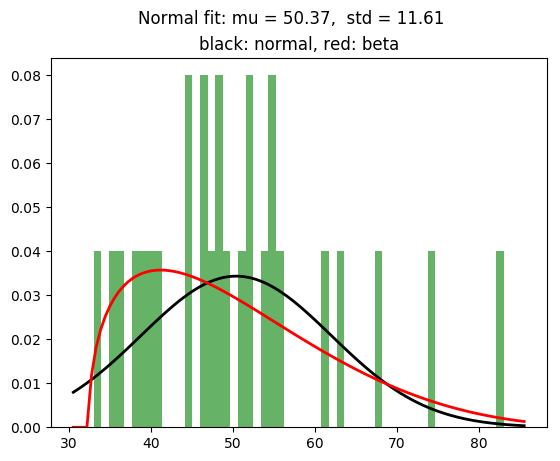

In [19]:
plt.show()

In [20]:
from scipy.stats import  sem

print("95% confidence interval on the mean assuming normal distribution")
print(norm.interval(0.68, mu, std))
print("95% confidence interval on the mean assuming beta distribution")
print(beta.interval(0.68, *betaparams))




95% confidence interval on the mean assuming normal distribution
(38.820100040484945, 61.920640700255809)
95% confidence interval on the mean assuming beta distribution
(38.395387634995991, 62.745943643902933)


In [21]:
print("90% sure that I will be at work in (normal/beta) minutes or less")
print(norm.ppf(.90, mu, std))
print(beta.ppf(.90, *betaparams))

print("60% sure that I will be at work in (normal/beta) minutes or less")
print(norm.ppf(.60, mu, std))
print(beta.ppf(.60, *betaparams))

print("90% sure that I will take (normal/beta) minutes or more")
print(norm.ppf(.10, mu, std))
print(beta.ppf(.10, *betaparams))


90% sure that I will be at work in (normal/beta) minutes or less
65.255130473
67.3066737851
60% sure that I will be at work in (normal/beta) minutes or less
53.3129057737
51.6109236119
90% sure that I will take (normal/beta) minutes or more
35.4856102678
36.6017160349


In [22]:
def poly_basis(x, degree=1):
    X = pd.DataFrame(x)
    X[1] = X[0]
    X[0] = 1
    for i in range(0, degree+1):
        X[i] = X[1]**i
    return X

def fourier_basis(x, o=1, degree=1):
    try:
        X_0 = pd.DataFrame(x)
        X = pd.DataFrame(x)
    except:
        X = pd.DataFrame([x])
        X_0 = pd.DataFrame([x])
    X[0] = 1 # b
    
    for i in range(0, degree):
        X[2*i+1] = X_0.apply(lambda x: math.sin((i+1)*o*x), axis=1)
        X[2*i+2] = X_0.apply(lambda x: math.cos((i+1)*o*x ), axis=1)
    return X

basis = lambda x: fourier_basis(x, 2, 3)


mean = sum(data)/len(data)
# mean = 0
X = basis(start_time)
t = data - mean


In [23]:
# from machine learning class notes page 71
_lambda = 0.05
w = np.dot(np.linalg.inv(np.dot(X.T, X) + len(X) * _lambda * np.identity(X.shape[1])), np.dot(X.T, t))
w
s_2 = 1/len(data) * (np.dot(t.T, t) - np.dot(np.dot(t.T, X), w))
print("weights (bias first)")
print(w)
print("variance")
print(s_2)

weights (bias first)
[-2.32703537 -3.3725603   1.92621557  1.0120614  -0.08084222  3.82522761
 -6.89482518]
variance
99.5482901796


In [44]:
# plot it

fit_fn = lambda x : np.dot(basis(x), w) + mean

bleh = np.arange(8.0, 10.6, 0.01)
last_n = 1

# plt.subplot(212)
plt.plot(start_time, t + mean, 'go', 
         bleh, fit_fn(bleh), '-k', 
         start_time[-last_n:], t[-last_n:] + mean, 'sr'
         
        )
# plt.ylim(30, 70)
plt.xlim(8,10.6)


(8, 10.6)

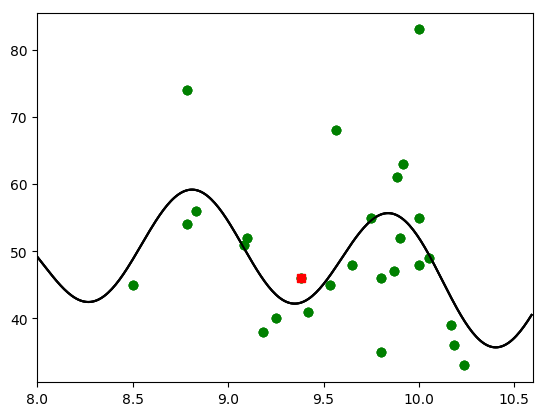

In [45]:
plt.show()

In [15]:
currenttime = 9+23/60
print(fit_fn(currenttime))
    
print("95% confidence interval on the mean assuming normal distribution")
print(norm.interval(0.68, fit_fn(currenttime), math.sqrt(s_2)))

print("90% sure that I will be at work in (normal/beta) minutes or less")
print(norm.ppf(.90, fit_fn(currenttime), math.sqrt(s_2)))

print("60% sure that I will be at work in (normal/beta) minutes or less")
print(norm.ppf(.60, fit_fn(currenttime), math.sqrt(s_2)))

print("90% sure that I will take (normal/beta) minutes or more")
print(norm.ppf(.10, fit_fn(currenttime), math.sqrt(s_2)))


[ 41.56334488]
95% confidence interval on the mean assuming normal distribution
(array([ 31.48868693]), array([ 51.63800283]))
90% sure that I will be at work in (normal/beta) minutes or less
[ 54.54649267]
60% sure that I will be at work in (normal/beta) minutes or less
[ 44.12995474]
90% sure that I will take (normal/beta) minutes or more
[ 28.58019709]


In [34]:
# let's try to do it with a prior now.



In [9]:
# Let's try this blog post I found
# http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/


# Create some convenience routines for plotting

def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)


def plot_MCMC_trace(ax, xdata, ydata, trace, scatter=False, **kwargs):
    """Plot traces and contours"""
    xbins, ybins, sigma = compute_sigma_level(trace[0], trace[1])
    ax.contour(xbins, ybins, sigma.T, levels=[0.683, 0.955], **kwargs)
    if scatter:
        ax.plot(trace[0], trace[1], ',k', alpha=0.1)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\beta$')
    
    
def plot_MCMC_model(ax, xdata, ydata, trace):
    """Plot the linear model and 2sigma contours"""
    ax.plot(xdata, ydata, 'ok')

    alpha, beta = trace[:2]
    xfit = np.linspace(9, 11, 10)
    yfit = alpha[:, None] + beta[:, None] * xfit
    mu = yfit.mean(0)
    sig = 2 * yfit.std(0)

    ax.plot(xfit, mu, '-k')
    ax.fill_between(xfit, mu - sig, mu + sig, color='lightgray')

    ax.set_xlabel('x')
    ax.set_ylabel('y')


def plot_MCMC_results(xdata, ydata, trace, colors='k'):
    """Plot both the trace and the model together"""
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plot_MCMC_trace(ax[0], xdata, ydata, trace, True, colors=colors)
    plot_MCMC_model(ax[1], xdata, ydata, trace)
    
    
    

In [6]:
import emcee
print(emcee.__version__)

# Define our posterior using Python functions
# for clarity, I've separated-out the prior and likelihood
# but this is not necessary. Note that emcee requires log-posterior

def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)




2.2.1


In [199]:
# Here we'll set up the computation. emcee combines multiple "walkers",
# each of which is its own MCMC chain. The number of trace results will
# be nwalkers * nsteps

ndim = 3  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# Here's the function call where all the work happens:
# we'll time it using IPython's %time magic

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[start_time, data])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

emcee: Exception while calling your likelihood function:
  params: [ 0.5488135   0.71518937  0.60276338  0.54488318]
  args: [array([ 10.23333333,  10.05      ,   9.88333333,  10.16666667,
        10.        ,   9.75      ,   9.25      ,   9.91666667,
         9.9       ,   9.56666667,   9.1       ,   9.41666667,
         8.83333333,   9.86666667,   9.8       ]), array([33, 49, 61, 39, 48, 55, 40, 63, 52, 68, 52, 41, 56, 47, 46])]
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/opt/anaconda/envs/ayfiepy/lib/python3.5/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-6-a952260976e6>", line 21, in log_posterior
    return log_prior(theta) + log_likelihood(theta, x, y)
  File "<ipython-input-6-a952260976e6>", line 9, in log_prior
    alpha, beta, sigma = theta
ValueError: too many values to unpack (expected 3)


ValueError: too many values to unpack (expected 3)

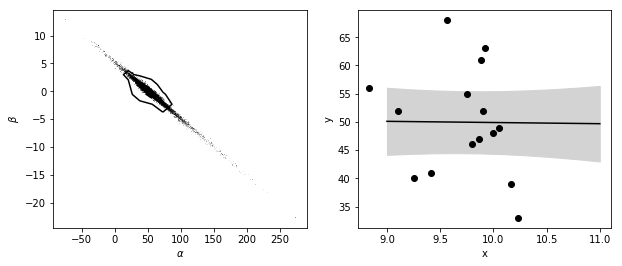

In [198]:
# sampler.chain is of shape (nwalkers, nsteps, ndim)
# we'll throw-out the burn-in points and reshape:
emcee_trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T
plot_MCMC_results(start_time, data, emcee_trace)
plt.show()